In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('data/heart.csv', low_memory=False)

In [3]:
print('Number of rows in the dataset:', raw_data.shape[0])
print('Number of columns in the dataset:', raw_data.shape[1])

Number of rows in the dataset: 303
Number of columns in the dataset: 14


In [4]:
raw_data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### Data contains

**age**: The person's age in years  
**sex**: The person's sex (1 = *male*, 0 = *female*)  
**cp**: The chest pain experienced (0 = *typical angina*, 1 = *atypical angina*, 2 = *non-anginal pain*, 3 = *asymptomatic*)  
**trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)  
**chol**: The person's cholesterol measurement in mg/dl  
**fbs**: The person's fasting blood sugar (> 120 mg/dl, 0 = *no*, 1 = *yes*)  
**restecg**: Resting electrocardiographic measurement (0 = *normal*, 1 = *having ST-T wave abnormality*, 2 = *showing probable or definite left ventricular hypertrophy by Estes' criteria*)  
**thalach**: The person's maximum heart rate achieved  
**exang**: Exercise induced angina (0 = *no*, 1 = *yes*)  
**oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))  
**slope**: the slope of the peak exercise ST segment (0 = *upsloping*, 1 = *flat*, 2 = *downsloping*)  
**ca**: The number of major vessels (0-3)  
**thal**: A blood disorder called thalassemia (3 = *normal*; 6 = *fixed defect*; 7 = *reversable defect*)  
**target**: Heart disease (0 = *no*, 1 = *yes*)

In [6]:
raw_data.columns = ['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Cholesterol', 'Fasting_Blood_Sugar',
                    'Rest_ECG', 'Max_Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'ST_Slope',
                    'Num_Major_Vessels', 'Thalassemia', 'Target']

In [7]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
Sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
Chest_Pain_Type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
Resting_Blood_Pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
Fasting_Blood_Sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
Rest_ECG,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
Max_Heart_Rate_Achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
Exercise_Induced_Angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
ST_Depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
raw_data[raw_data.duplicated() == True]

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,ST_Slope,Num_Major_Vessels,Thalassemia,Target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
raw_data.drop_duplicates(inplace = True)
raw_data[raw_data.duplicated() == True]

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,ST_Slope,Num_Major_Vessels,Thalassemia,Target


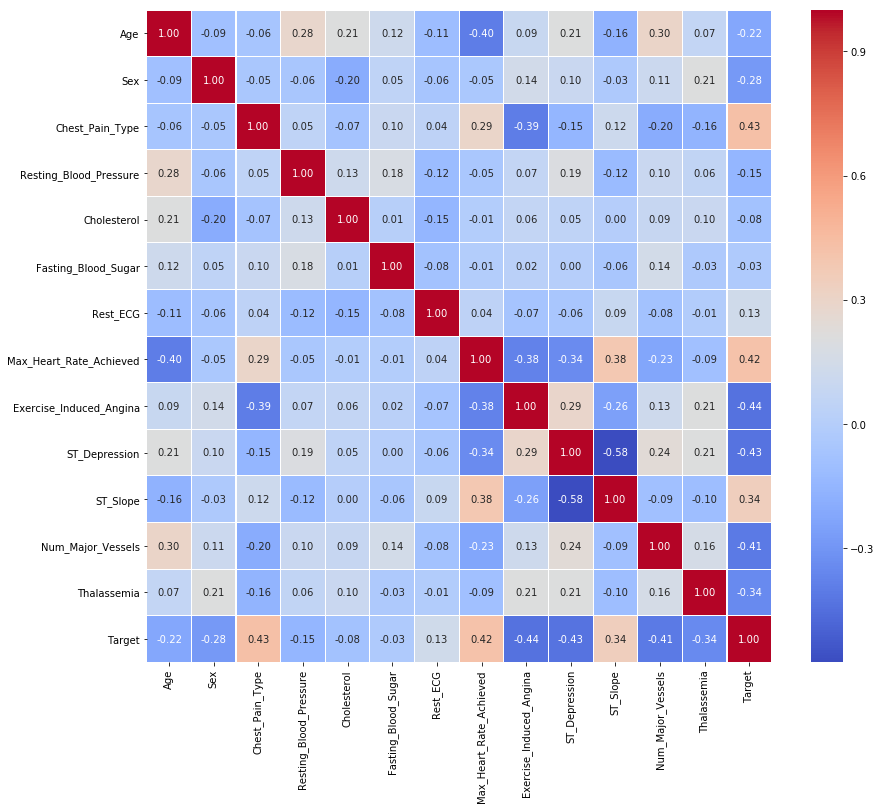

In [10]:
plt.figure(figsize=(14, 12))
sns.heatmap(raw_data.corr(), annot = True, cmap='coolwarm', linewidths=.1, fmt='1.2f')

### Importing ML models, tools and metrics

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [13]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc 

### Data split - Train/Validation/Test

In [14]:
trainval_data, test_data, trainval_labels, test_labels = train_test_split(
    raw_data.drop('Target', axis=1), raw_data['Target'], test_size=0.2, random_state=10
)

In [15]:
train_data, val_data, train_labels, val_labels = train_test_split(
    trainval_data, trainval_labels, test_size=0.325, random_state=11
)

In [16]:
[x.shape for x in (train_data, val_data, test_data, train_labels, val_labels, test_labels)]

[(162, 13), (79, 13), (61, 13), (162,), (79,), (61,)]

### Logistic Regression

In [17]:
model = LogisticRegression(solver='lbfgs', max_iter=5000)

In [18]:
model.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
predictions = model.predict(val_data)
pred_quant = model.predict_proba(val_data)[:, 1]

In [20]:
model_accu = accuracy_score(val_labels, predictions)
print('Using Logistic Regression we get an accuracy score of:', model_accu)
print('Using Logistic Regression we get an accuracy score of:', str(round(model_accu * 100, 2))+'%')

Using Logistic Regression we get an accuracy score of: 0.8860759493670886
Using Logistic Regression we get an accuracy score of: 88.61%


In [21]:
model_f1 = f1_score(val_labels, predictions, average='micro')
print('Using Logistic Regression we get an F-score of:', model_f1)
print('Using Logistic Regression we get an F-score of:', str(round(model_f1 * 100, 2))+'%')

Using Logistic Regression we get an F-score of: 0.8860759493670886
Using Logistic Regression we get an F-score of: 88.61%


In [22]:
print(classification_report(val_labels, predictions))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        36
           1       0.85      0.95      0.90        43

   micro avg       0.89      0.89      0.89        79
   macro avg       0.89      0.88      0.88        79
weighted avg       0.89      0.89      0.88        79



In [23]:
model_cm = confusion_matrix(val_labels, predictions)

Text(33.0, 0.5, 'Actual Labels')

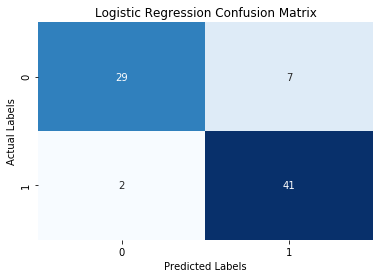

In [24]:
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(model_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

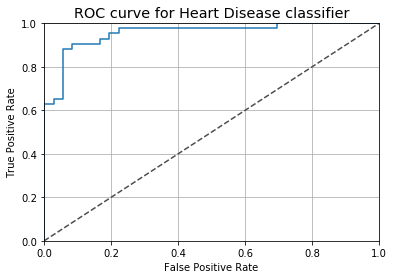

In [25]:
fpr, tpr, threshold = roc_curve(val_labels, pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [26]:
model_auc = auc(fpr, tpr)
print('Area Under the Curve (AUC):', str(round(model_auc * 100, 2))+"%")

Area Under the Curve (AUC): 95.48%


### Random Forest Classifier

In [27]:
model = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)

In [28]:
model.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
predictions = model.predict(val_data)
pred_quant = model.predict_proba(val_data)[:, 1]

In [30]:
model_accu = accuracy_score(val_labels, predictions)
print('Using Random Forest we get an accuracy score of:', model_accu)
print('Using Random Forest we get an accuracy score of:', str(round(model_accu * 100, 2))+'%')

Using Random Forest we get an accuracy score of: 0.8607594936708861
Using Random Forest we get an accuracy score of: 86.08%


In [31]:
model_f1 = f1_score(val_labels, predictions, average='micro')
print('Using Random Forest we get an F-score of:', model_f1)
print('Using Random Forest we get an F-score of:', str(round(model_f1 * 100, 2))+'%')

Using Random Forest we get an F-score of: 0.8607594936708861
Using Random Forest we get an F-score of: 86.08%


In [32]:
print(classification_report(val_labels, predictions))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        36
           1       0.85      0.91      0.88        43

   micro avg       0.86      0.86      0.86        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.86      0.86      0.86        79



In [33]:
model_cm = confusion_matrix(val_labels, predictions)

Text(30.0, 0.5, 'Actual Labels')

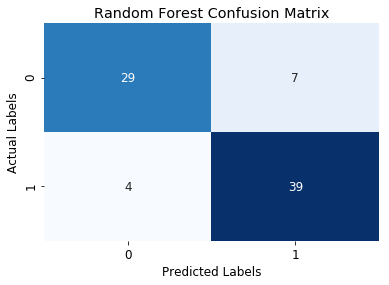

In [34]:
plt.title("Random Forest Confusion Matrix")
sns.heatmap(model_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

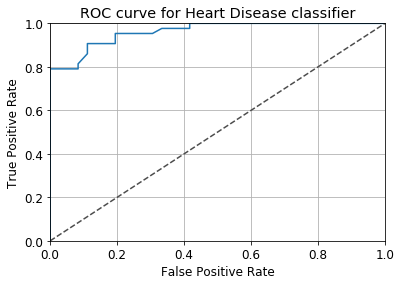

In [35]:
fpr, tpr, threshold = roc_curve(val_labels, pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [36]:
model_auc = auc(fpr, tpr)
print('Area Under the Curve (AUC):', str(round(model_auc * 100, 2))+"%")

Area Under the Curve (AUC): 96.22%


### Is it possible to improve ML model?

In [37]:
from sklearn import preprocessing

In [38]:
proc_data = raw_data.copy()

### Feature Preprocessing

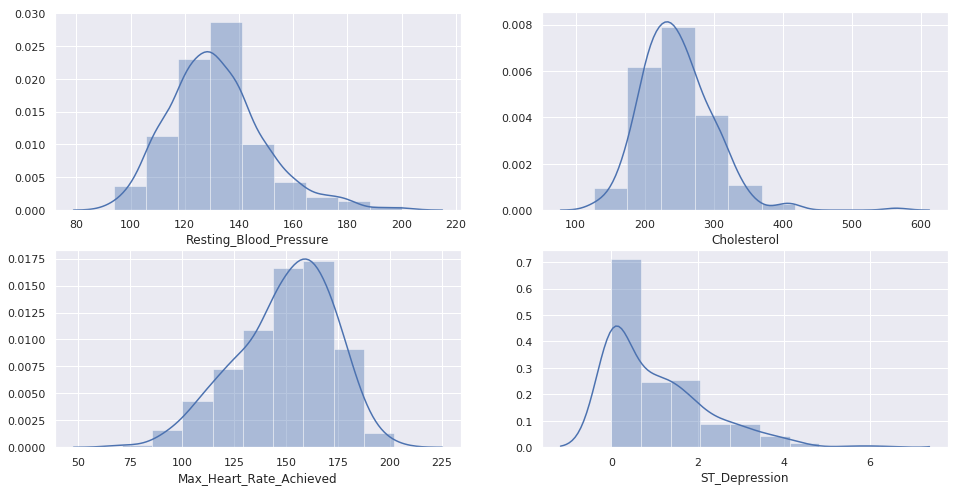

In [39]:
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")


plt.subplot(2, 2, 1)
sns.distplot(proc_data['Resting_Blood_Pressure'], bins = 9)

plt.subplot(2, 2, 2)
sns.distplot(proc_data['Cholesterol'], bins = 9)

plt.subplot(2, 2, 3)
sns.distplot(proc_data['Max_Heart_Rate_Achieved'], bins = 9)

plt.subplot(2, 2, 4)
sns.distplot(proc_data['ST_Depression'], bins = 9)

In [40]:
proc_data['Resting_Blood_Pressure'] = preprocessing.scale(proc_data['Resting_Blood_Pressure'])
proc_data['Cholesterol'] = preprocessing.scale(proc_data['Cholesterol'])
proc_data['Max_Heart_Rate_Achieved'] = preprocessing.scale(proc_data['Max_Heart_Rate_Achieved'])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [41]:
cp = pd.get_dummies(proc_data['Chest_Pain_Type'], prefix = 'Chest_Pain_Type')
thal = pd.get_dummies(proc_data['Thalassemia'], prefix = 'Thalassemia')
slope = pd.get_dummies(proc_data['ST_Slope'], prefix = 'ST_Slope')
restecg = pd.get_dummies(proc_data['Rest_ECG'], prefix = 'Rest_ECG')

In [42]:
proc_data = pd.concat([proc_data, cp, thal, slope, restecg], axis=1)

In [43]:
proc_data.drop(['Chest_Pain_Type', 'Thalassemia', 'ST_Slope', 'Rest_ECG'], axis=1, inplace=True)

### Data split - Train/Test

In [44]:
trainval_data, test_data, trainval_labels, test_labels = train_test_split(
    proc_data.drop('Target', axis=1), proc_data['Target'], test_size=0.2, random_state=10
)

In [45]:
train_data, val_data, train_labels, val_labels = train_test_split(
    trainval_data, trainval_labels, test_size=0.325, random_state=11
)

In [46]:
[x.shape for x in (train_data, val_data, test_data, train_labels, val_labels, test_labels)]

[(162, 23), (79, 23), (61, 23), (162,), (79,), (61,)]

### Logistic Regression

In [47]:
model = LogisticRegression(solver='lbfgs', max_iter=5000)

In [48]:
model.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
predictions = model.predict(val_data)
pred_quant = model.predict_proba(val_data)[:, 1]

In [50]:
model_accu = accuracy_score(val_labels, predictions)
print('Using Logistic Regression we get an accuracy score of:', model_accu)
print('Using Logistic Regression we get an accuracy score of:', str(round(model_accu * 100, 2))+'%')

Using Logistic Regression we get an accuracy score of: 0.8987341772151899
Using Logistic Regression we get an accuracy score of: 89.87%


In [51]:
model_f1 = f1_score(val_labels, predictions, average='micro')
print('Using Logistic Regression we get an F-score of:', model_f1)
print('Using Logistic Regression we get an F-score of:', str(round(model_f1 * 100, 2))+'%')

Using Logistic Regression we get an F-score of: 0.8987341772151899
Using Logistic Regression we get an F-score of: 89.87%


In [52]:
print(classification_report(val_labels, predictions))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.89      0.93      0.91        43

   micro avg       0.90      0.90      0.90        79
   macro avg       0.90      0.90      0.90        79
weighted avg       0.90      0.90      0.90        79



In [53]:
model_cm = confusion_matrix(val_labels, predictions)

Text(30.5, 0.5, 'Actual Labels')

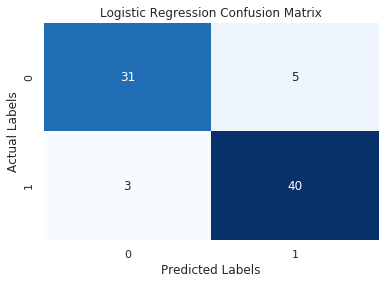

In [54]:
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(model_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

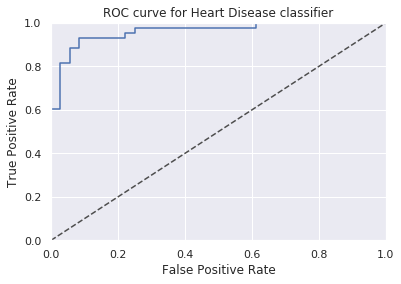

In [55]:
fpr, tpr, threshold = roc_curve(val_labels, pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [56]:
model_auc = auc(fpr, tpr)
print('Area Under the Curve (AUC):', str(round(model_auc * 100, 2))+"%")

Area Under the Curve (AUC): 96.12%


### Random Forest Classifier

In [57]:
model = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)

In [58]:
model.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
predictions = model.predict(val_data)
pred_quant = model.predict_proba(val_data)[:, 1]

In [60]:
model_accu = accuracy_score(val_labels, predictions)
print('Using Random Forest we get an accuracy score of:', model_accu)
print('Using Random Forest we get an accuracy score of:', str(round(model_accu * 100, 2))+'%')

Using Random Forest we get an accuracy score of: 0.9113924050632911
Using Random Forest we get an accuracy score of: 91.14%


In [61]:
model_f1 = f1_score(val_labels, predictions, average='micro')
print('Using Random Forest we get an F-score of:', model_f1)
print('Using Random Forest we get an F-score of:', str(round(model_f1 * 100, 2))+'%')

Using Random Forest we get an F-score of: 0.9113924050632911
Using Random Forest we get an F-score of: 91.14%


In [62]:
print(classification_report(val_labels, predictions))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.91      0.93      0.92        43

   micro avg       0.91      0.91      0.91        79
   macro avg       0.91      0.91      0.91        79
weighted avg       0.91      0.91      0.91        79



In [63]:
model_cm = confusion_matrix(val_labels, predictions)

Text(30.5, 0.5, 'Actual Labels')

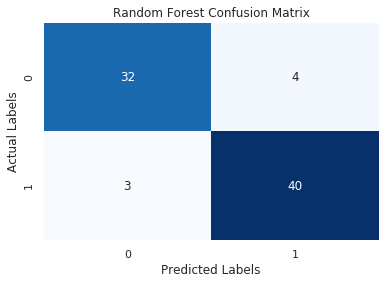

In [64]:
plt.title("Random Forest Confusion Matrix")
sns.heatmap(model_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

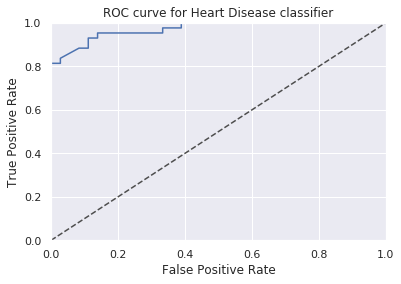

In [65]:
fpr, tpr, threshold = roc_curve(val_labels, pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [66]:
model_auc = auc(fpr, tpr)
print('Area Under the Curve (AUC):', str(round(model_auc * 100, 2))+"%")

Area Under the Curve (AUC): 97.16%


### Testing model with Test dataset

In [67]:
predictions = model.predict(test_data)
pred_quant = model.predict_proba(test_data)[:, 1]

In [68]:
model_accu = accuracy_score(test_labels, predictions)
print('Using Random Forest on test dataset we get an accuracy score of:', model_accu)
print('Using Random Forest on test dataset we get an accuracy score of:', str(round(model_accu * 100, 2))+'%')

Using Random Forest on test dataset we get an accuracy score of: 0.7868852459016393
Using Random Forest on test dataset we get an accuracy score of: 78.69%


In [69]:
model_f1 = f1_score(test_labels, predictions, average='micro')
print('Using Random Forest on test dataset we get an F-score of:', model_f1)
print('Using Random Forest on test dataset we get an F-score of:', str(round(model_f1 * 100, 2))+'%')

Using Random Forest on test dataset we get an F-score of: 0.7868852459016392
Using Random Forest on test dataset we get an F-score of: 78.69%


In [70]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        33
           1       0.71      0.89      0.79        28

   micro avg       0.79      0.79      0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.81      0.79      0.79        61



In [71]:
model_cm = confusion_matrix(test_labels, predictions)

Text(30.5, 0.5, 'Actual Labels')

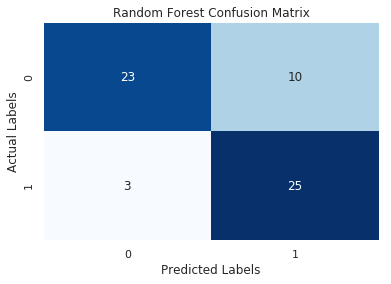

In [72]:
plt.title("Random Forest Confusion Matrix")
sns.heatmap(model_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

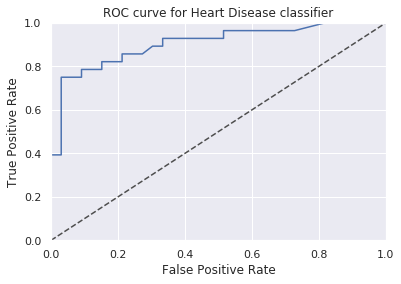

In [73]:
fpr, tpr, threshold = roc_curve(test_labels, pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [74]:
model_auc = auc(fpr, tpr)
print('Area Under the Curve (AUC):', str(round(model_auc * 100, 2))+"%")

Area Under the Curve (AUC): 90.48%
